# **PRODUCTIVITY PREDICTION OF GARMENT INDUSTRY EMPLOYEES**


# **1. Introduction**

## **Overview**

The garment industry deals with the production of different types of clothing. It is a trillion-dollar industry on the global scale ([reference](https://fashionunited.com/global-fashion-industry-statisticshttps://)), and is a labor- and capital-intensive industry. Workforce productivity in general refers to a measurement of goods and/or services produced by a group of workers within a given time period. High productivity levels by a team translate to higher profits, and are an indication of efficient use of the inputs in the production process. Worker productivity in the garment industry should therefore be maximized as it is a key factor to its success.

## **Defining the question**

The main objective of the study is to Data Analysis that can find out  the level of productivity of employee teams in the garment industry.and we are able to create a model which is able to predict the productivity of employee


**Why?**

Low workforce productivity in a company can lead to reduced profitability, increased conflict, high employee turnover, and a lack of motivation. It is therefore important for a company to be able to track and predict its levels of productivity and investigate the factors that influence this. 

## **Metrics for success**


* Building a model that can predict employee productivity (Best model should have the lowest Root Mean Squared Error  about 0.1 or less).
* Identifying the top factors influencing the productivity level of employees.


## **Recording experimental design**

*   Determine the main objectives
*   Load and preview the dataset.
*   Understand the data.
*   Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
*    Carry out univariate analysis, bivariate analysis, and modelling.
*   Challenge the solution.
*   Conclusion and recommendations

## **Data source and column explanations**

The dataset is from UCI machine learning repository and can be accessed [here](http://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees).

Column definitions:

1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team_no : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers.




# **2. Data Loading**

In [58]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



## **Loading and Checking the Data**

In [59]:
#reading csv file

df= pd.read_csv('garments_worker_productivity.csv')

In [60]:
#previewing top rows
df.head(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570


In [61]:
#previewing bottom 4 rows
df.tail(4)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [62]:
# checking the shape of the dataset
df.shape

#the dataset has 1197 rows and 15 columns

(1197, 15)

In [63]:
#Checking datatypes, null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

# **3. Data Cleaning**

In [64]:
#renaming ambiguous columns
df = df.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

### separating variables

In [65]:
#separating variables for ease of analysis to those that can
#be considered continuous and categorical  
cat = ["quarter", "department", "day", "team", "no_of_style_change"]
con = ["targeted_productivity", "std_minute_value", "work_in_progress", "over_time", "idle_men", "incentive", "idle_time", "no_of_workers", "actual_productivity"]

In [66]:
#checking for missing values
df.isnull().sum()


#506 null values in work in progress

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
std_minute_value           0
work_in_progress         506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [67]:
#checking skewness
df.work_in_progress.skew()
#data is positively skewed
#Skewness helps you understand the shape of the data distribution

9.741786273952965

In [68]:
#filling in missing values with median as opposed to mean since the data is skewed

df['work_in_progress'].fillna(df['work_in_progress'].median(),inplace=True)

In [69]:
df.work_in_progress.median()

1039.0

In [70]:
#checking that there are no longer missing values
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
std_minute_value         0
work_in_progress         0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [71]:
# Checking for duplicates
df.duplicated().sum()

#no duplicates in the dataset

0

In [72]:
#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')


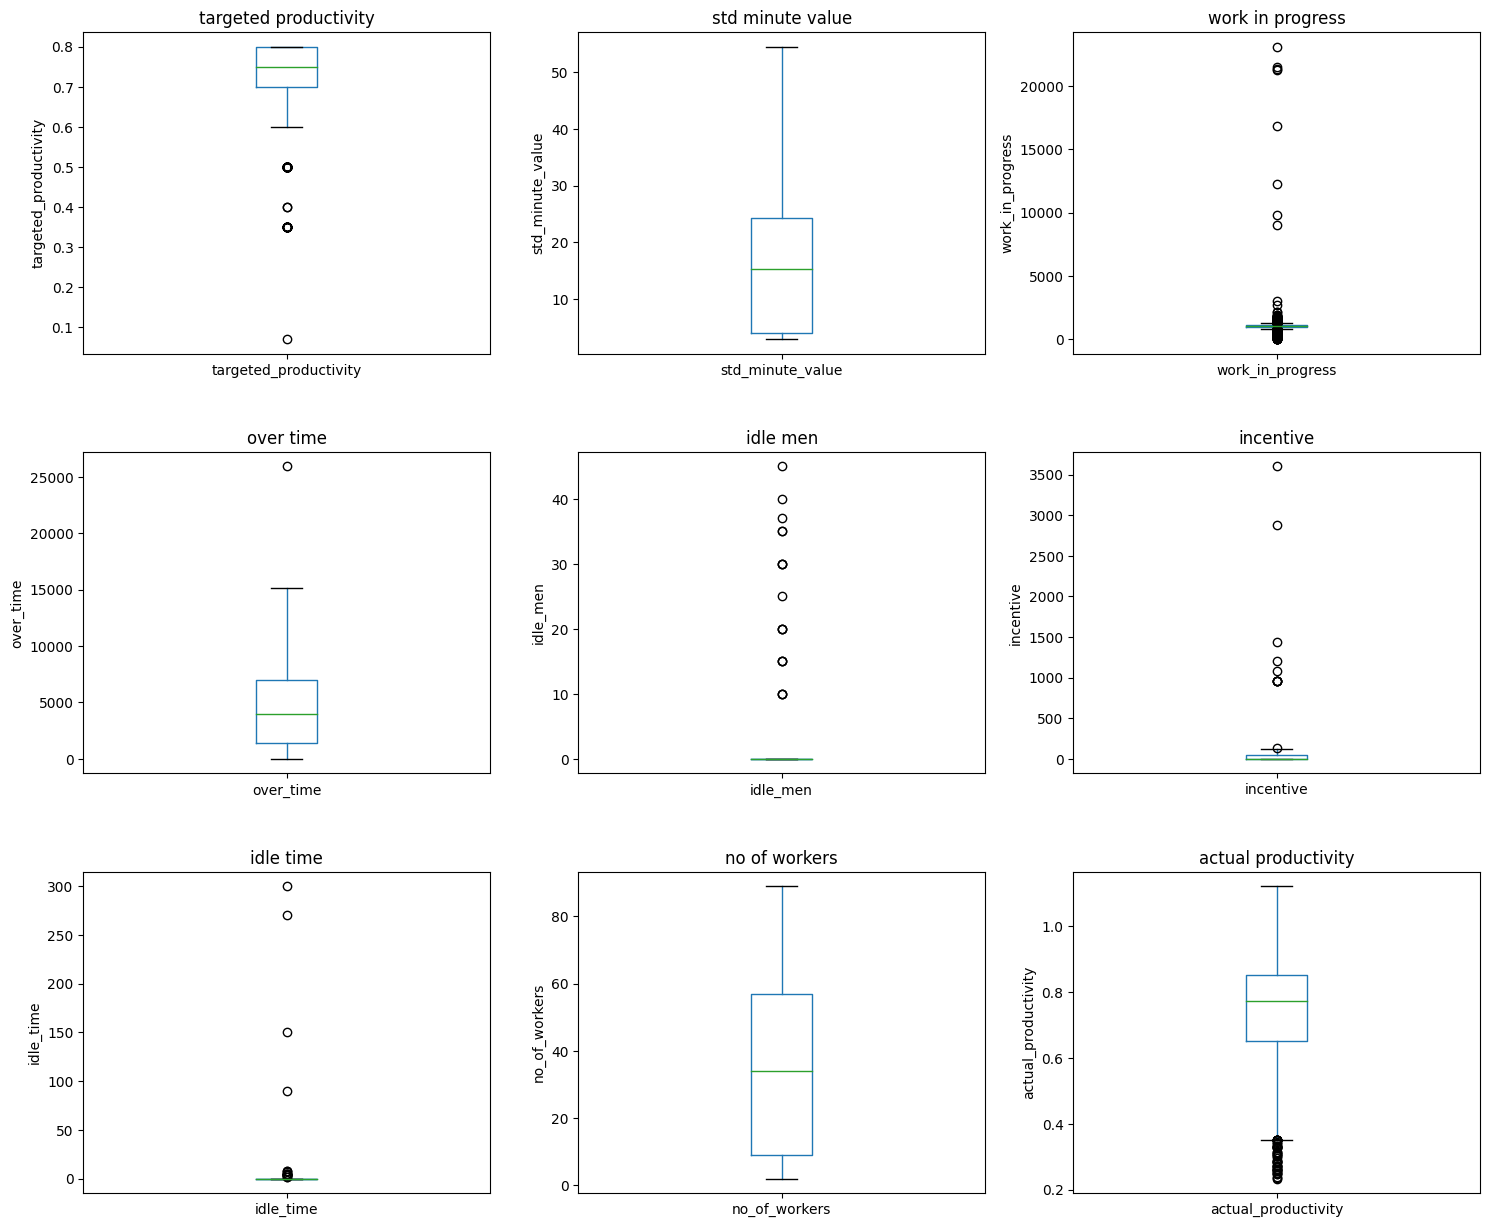

In [73]:
# Checking for outliers in continuous data

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(contin[i], grid=False, ax=ax)
  ax.set_title(f"{title(contin[i])}")
  ax.set_ylabel(contin[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

There were outliers in targeted productivity, overtime, work in progress, incentive, idle time, idle men, and actual productivity columns. They will not be dropped as they are likely due to natural variability in the workflow of different teams, where some teams perform significantly above or below average in terms of time, pending work, and productivity. Also, the performance of a particular team can vary on different days, with some days being significantly above or below average.

## checking for anomalies
Anomalies are observations that deviate significantly from the majority of the data points, and they can indicate errors

In [74]:
#checking for anomalies

#None of the values in the continuous columns should be negative
for col in con:
  print(len(df[df[col] < 0]))
#none had values < 0 

0
0
0
0
0
0
0
0
0


In [75]:
#checking for anomalies

#number of workers in each team should be a whole number
df['no_of_workers'].unique()

#there are some values with decimal points. 

array([59. ,  8. , 30.5, 56. , 57.5, 55. , 54. , 18. , 60. , 12. , 20. ,
       17. , 56.5, 54.5, 29.5, 31.5, 31. , 55.5, 58. , 10. , 16. , 32. ,
       58.5, 15. ,  5. , 57. , 53. , 51.5,  2. ,  9. ,  7. , 19. , 28. ,
       34. , 89. , 14. , 25. , 52. ,  4. , 21. , 35. , 51. , 33. , 11. ,
       33.5, 22. , 26. , 27. , 59.5, 50. , 44. , 49. , 47. , 48. , 42. ,
       24. , 45. , 46. , 39. , 38. ,  6. ])

In [76]:
#to deal with the anomalies above, the figures will be truncated

df['no_of_workers'] = df['no_of_workers'].apply(lambda x: int(x))

In [77]:
#checking that the figures were truncated

df['no_of_workers'].unique()

array([59,  8, 30, 56, 57, 55, 54, 18, 60, 12, 20, 17, 29, 31, 58, 10, 16,
       32, 15,  5, 53, 51,  2,  9,  7, 19, 28, 34, 89, 14, 25, 52,  4, 21,
       35, 33, 11, 22, 26, 27, 50, 44, 49, 47, 48, 42, 24, 45, 46, 39, 38,
        6], dtype=int64)

In [78]:
#checking for anomalies 

for col in cat:
  print(col)
  print(df[col].unique())
  
  
  print('\n')

quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




A month was divided into 4 quarters. However, there is a 'Quarter5' value observed.

Also, under department spelling of sewing is wrong and finishing appears as a unique value twice due to whitespace.

In [79]:
#exploring the anomalous quarter5
df[df['quarter'] == 'Quarter5']

,date,quarter,department,day,team,targeted_productivity,std_minute_value,work_in_progress,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,1039.0,1200,0,0.0,0,0,10,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,1039.0,1200,0,0.0,0,0,10,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,1039.0,960,0,0.0,0,0,8,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,1039.0,960,0,0.0,0,0,8,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,1039.0,1200,0,0.0,0,0,10,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,1039.0,1200,0,0.0,0,0,10,0.853667


It appears that quarter5 was assigned to days of the month above 28. Since January cannot be divided into equal 4 quarters, 29th and 31st will be assigned to quarter 4.

In [80]:
#replacing quarter5 (given to jan days above 28) with quarter4
df['quarter'] = df.quarter.str.replace('Quarter5', 'Quarter4')

In [81]:
#checking that there are now 4 quarters only
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4'], dtype=object)

In [82]:
# Removing the word Quarter from the quarter column and leave the numbers
df['quarter'] = df['quarter'].str.replace('Quarter','')

# Changing the datatype to numeric
df['quarter'] = df['quarter'].astype(int)

#confirming changes
print(df.quarter.unique())
print(df.quarter.dtype)

[1 2 3 4]
int32


In [83]:
# Correcting the spelling of sewing in the department column
df['department'] = df['department'].str.replace('sweing','sewing')

# Removing the spacing from the word finishing in the department column
df['department'] = df['department'].str.replace('finishing ','finishing')

#confirming changes
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [84]:
#datatype conversion

#date column to datetime

df['date'] = pd.to_datetime(df['date'])

In [85]:
#checking that conversion occured
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   int32         
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   std_minute_value       1197 non-null   float64       
 7   work_in_progress       1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [86]:
#saving cleaned data
df.to_csv('cleaned_productivity',index=False)

# **4. Univariate Analysis**

In [87]:
#statistical summaries of various numerical variables
df[con].describe()

,targeted_productivity,std_minute_value,work_in_progress,over_time,idle_men,incentive,idle_time,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1126.437761,4567.460317,0.369256,38.210526,0.730159,34.551378,0.735091
std,0.097891,10.943219,1397.653191,3348.823563,3.268987,160.182643,12.709757,22.152559,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,970.000000,1440.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1083.000000,6960.000000,0.000000,50.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,45.000000,3600.000000,300.000000,89.000000,1.120437


In [88]:
con

['targeted_productivity',
 'std_minute_value',
 'work_in_progress',
 'over_time',
 'idle_men',
 'incentive',
 'idle_time',
 'no_of_workers',
 'actual_productivity']

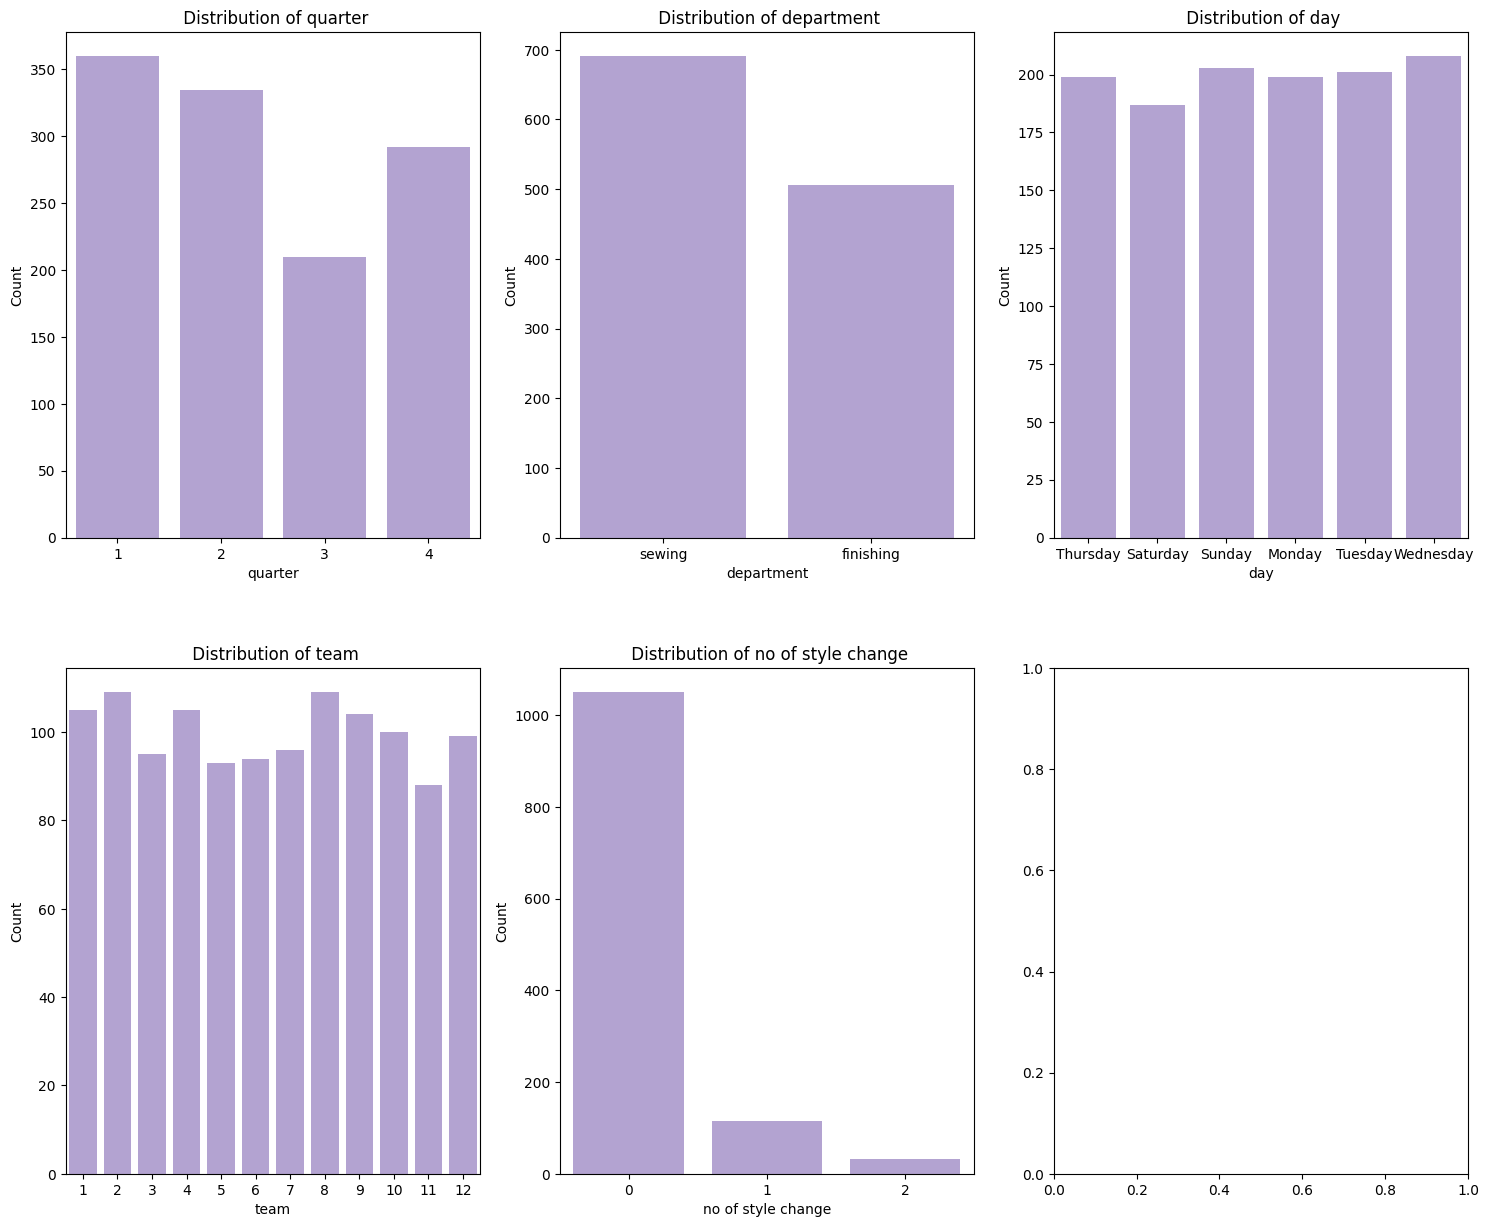

In [89]:
#countplots
fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
  if i < 5:
    sns.countplot(x=df[cat[i]], ax=ax, color="#B19CD8")
    ax.set_title(f" Distribution of {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("Count")


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Observations:
* Quarter one had the most records in the dataset.
* There were more records related to the sewing department than the finishing department.
* The day of the week with the most records is Wednesday.
* Teams 2 and 8 appeared more frequently than other teams in the dataset.
* For most records, the number of changes in the style of a particular product was 0.

# **5. Bivariate Analysis**

***Actual productivity by day of week, department, quarter of the month, team***

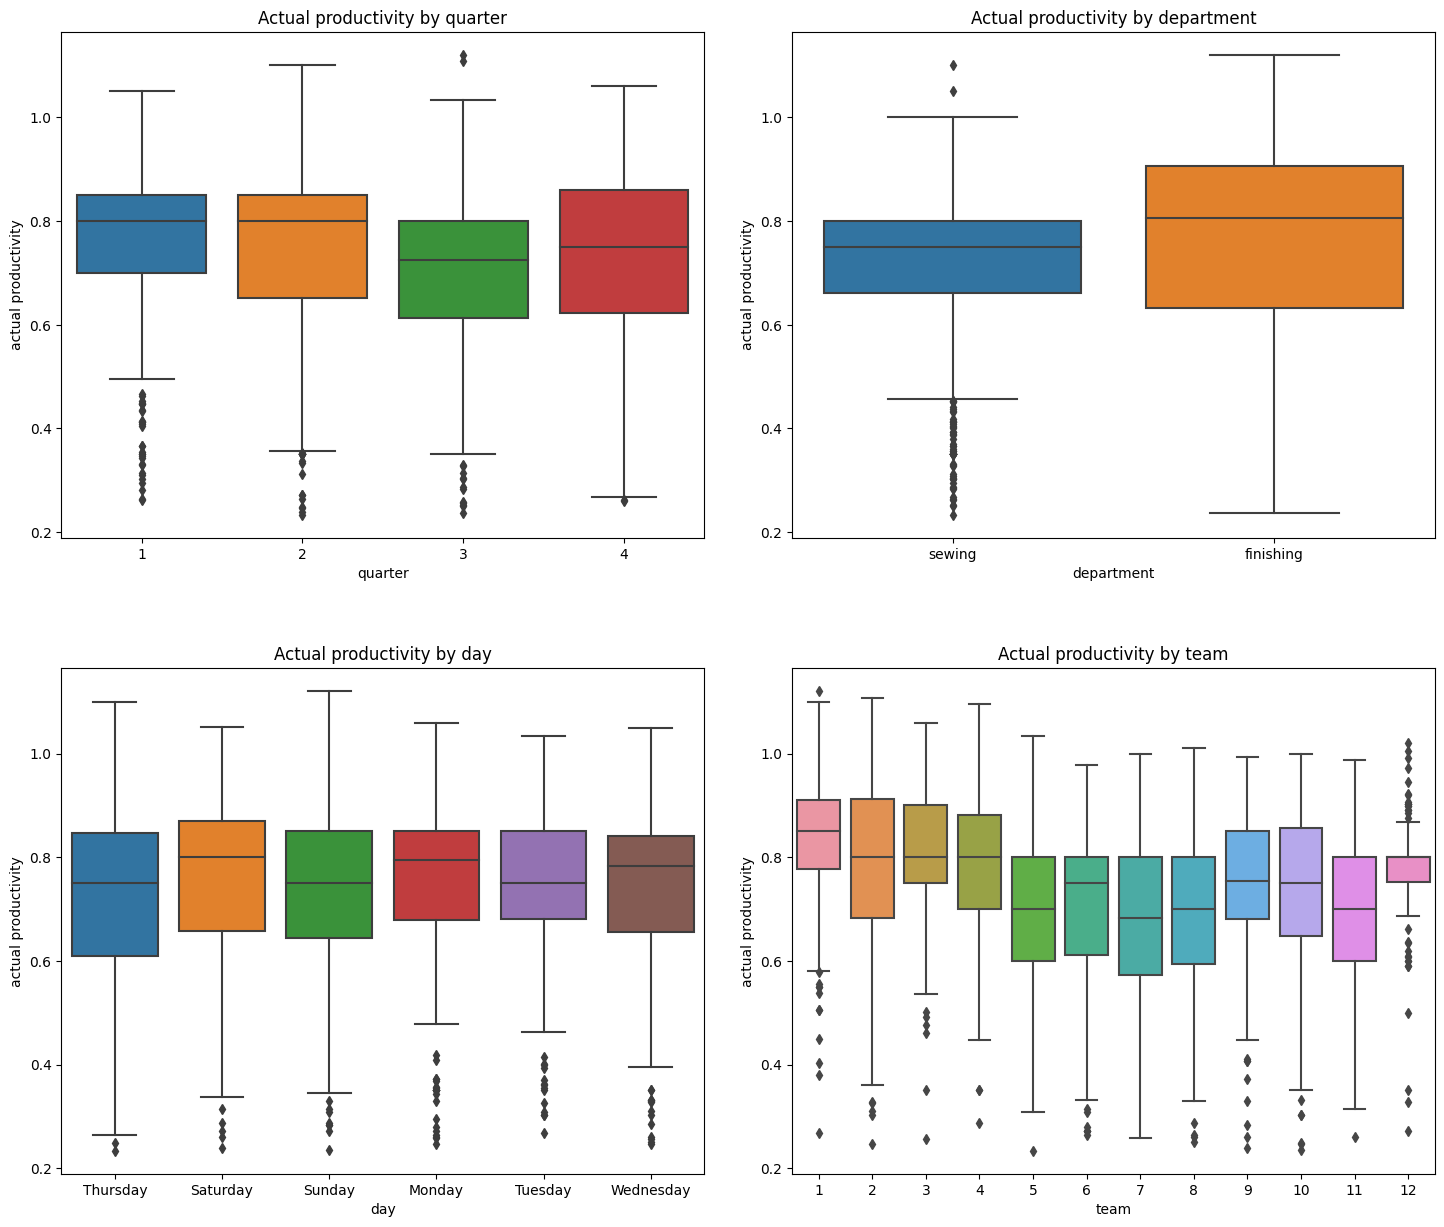

In [90]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data=df, x=cat[i], y='actual_productivity', ax=ax)
    ax.set_title(f"Actual productivity by {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

Observations:

The median actual productivity is highest:

* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays


***Average actual productivity by day of week, department, quarter of the month, and team.***

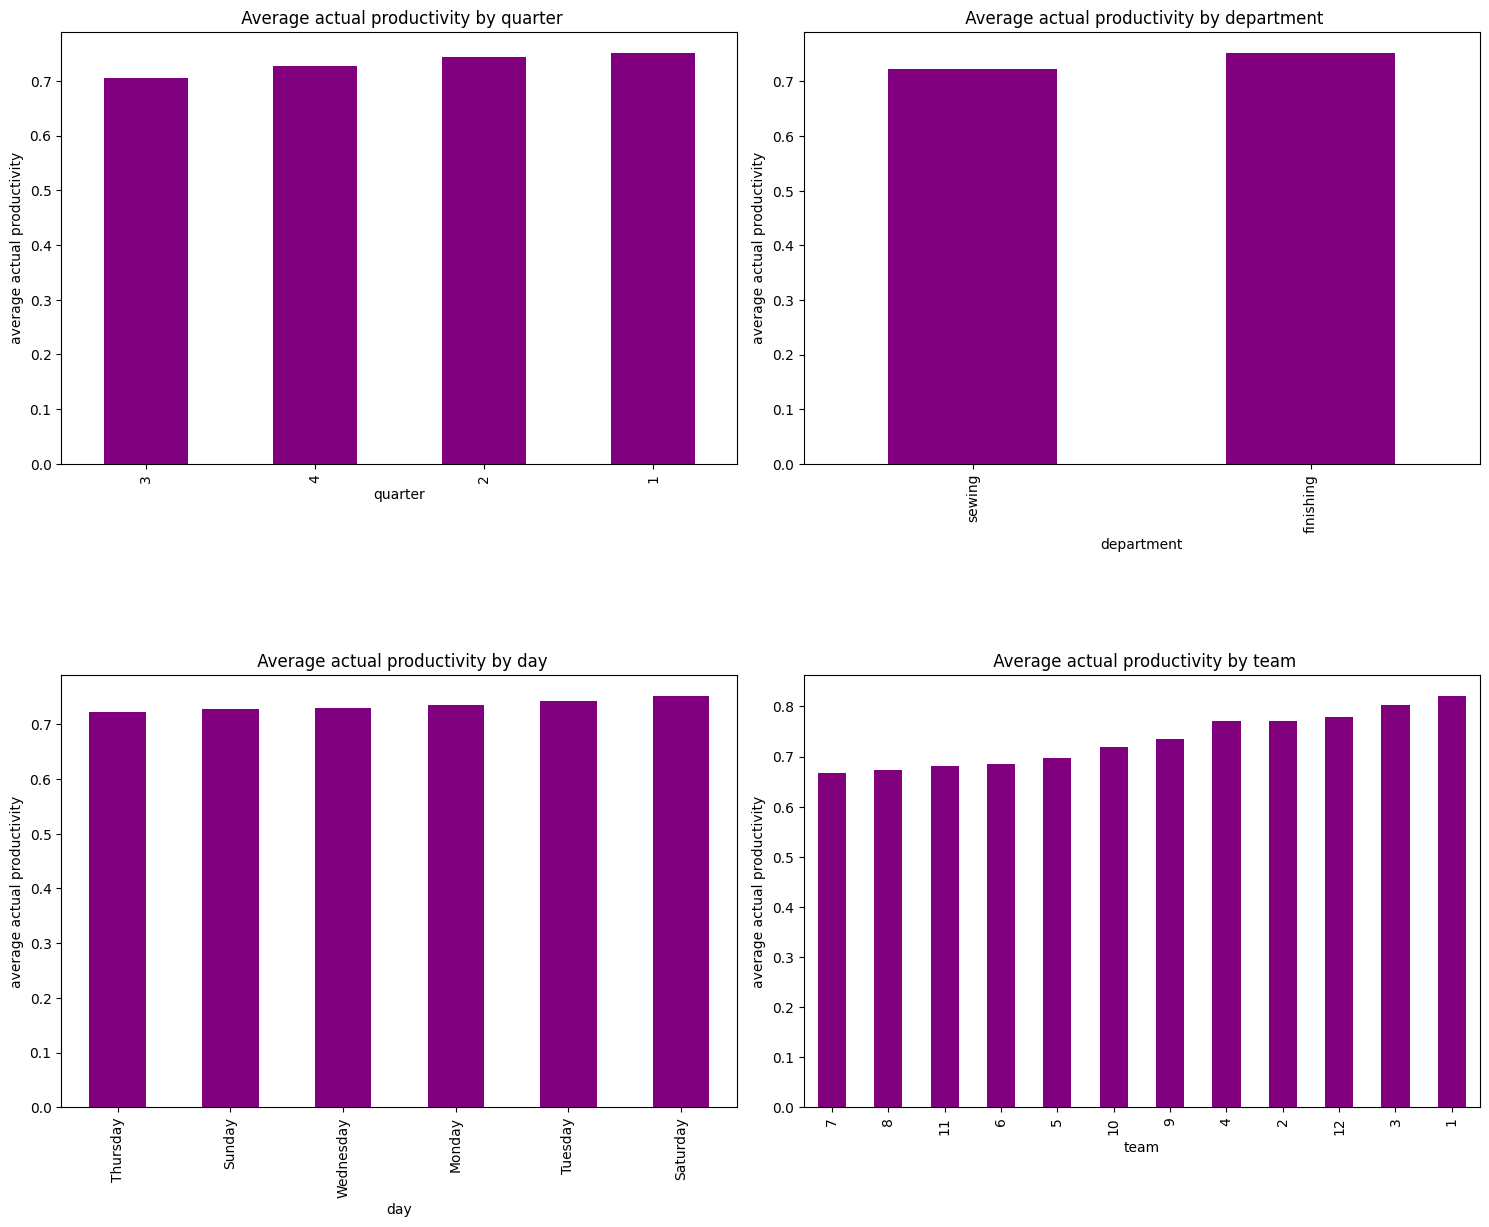

In [91]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):
    
    df.groupby([cat[i]])['actual_productivity'].mean().nsmallest(df[cat[i]].nunique()).plot.bar(ax=ax, color='purple')
    
    ax.set_title(f" Average actual productivity by {title(cat[i])}")
    ax.set_xlabel(title(cat[i]))
    ax.set_ylabel("average actual productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

Observations:

The mean actual productivity is highest:
* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays
* Team: in team 1

***Average standard minute value, over time, idle men,incentive, idle time and no of workers by productivity category (>0.5 or not)***

In [92]:
#function to group according to actual productivity levels
def categories(x):
  if x <= 0.5:
    return 'productivity <= 0.5'
  else:
    return 'productivity > 0.5'

df_cop = df.copy()
df_cop['actual_productivity_category'] = df['actual_productivity'].apply(lambda x: categories(x))

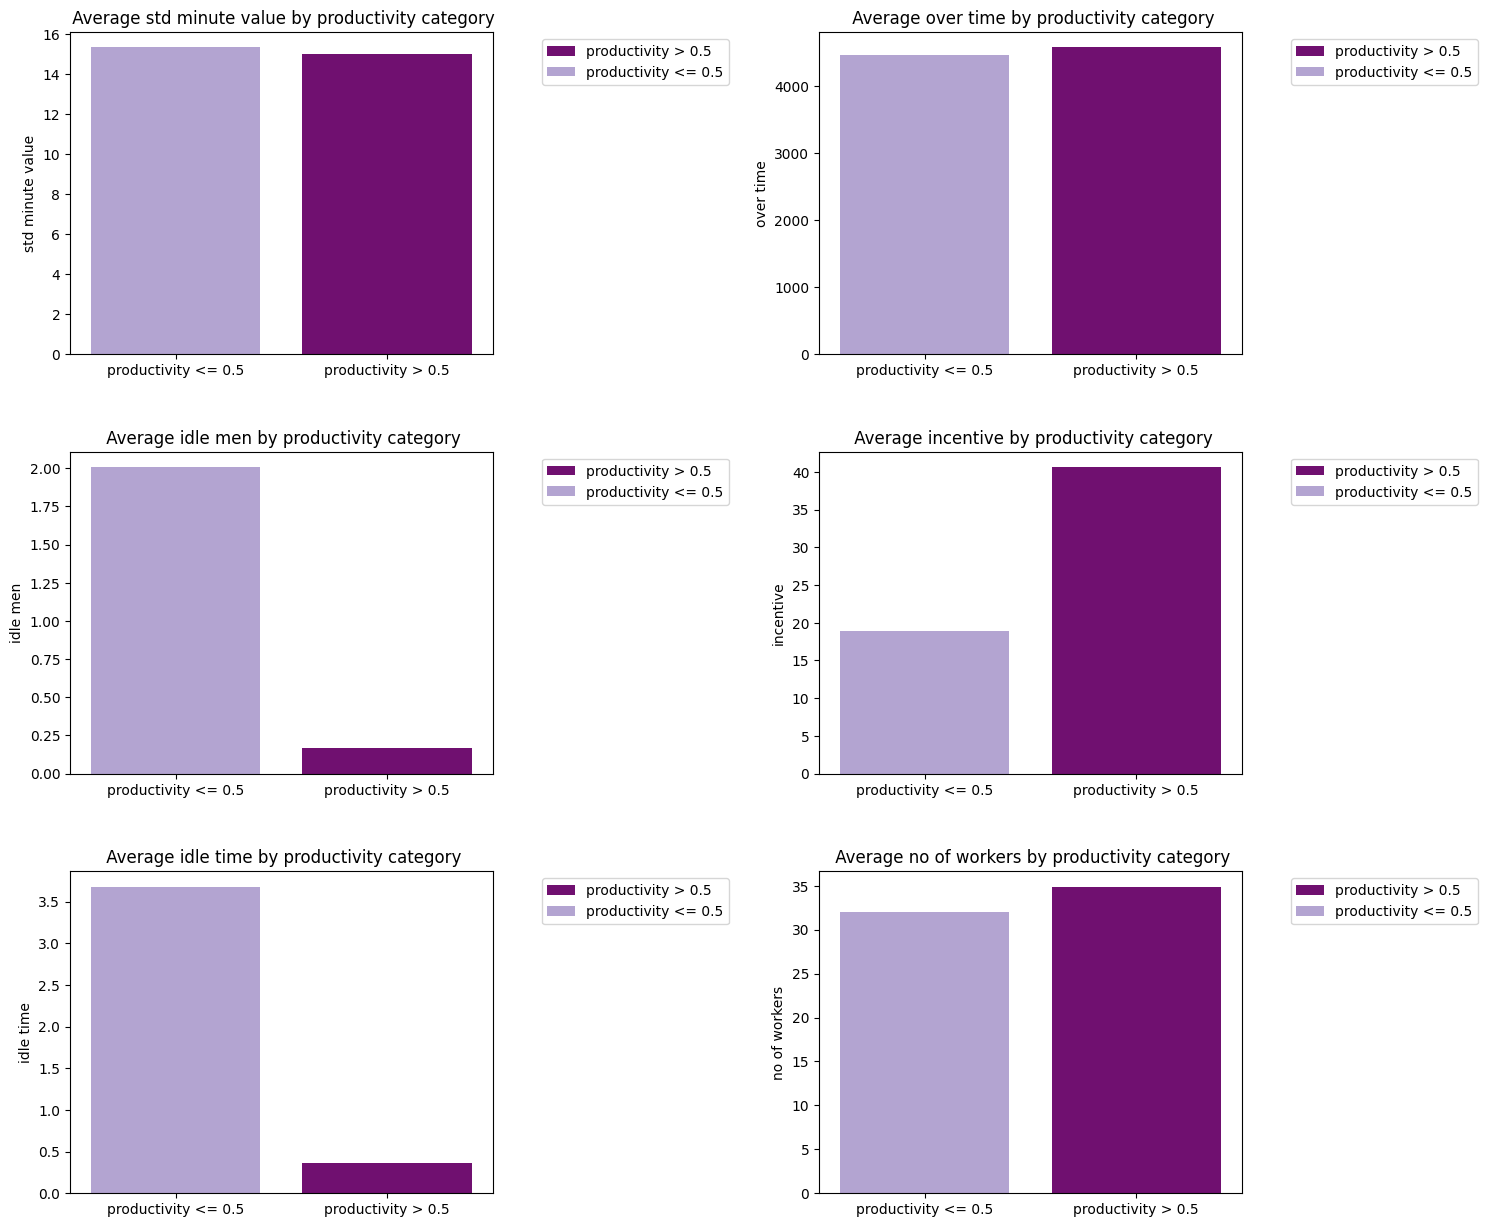

In [127]:
#plots
colsc = ['std_minute_value',
 'over_time',
 'idle_men',
 'incentive',
 'idle_time',
 'no_of_workers']
 
fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(15,8))

for i, ax in enumerate(axes.ravel()):

    # df_cop.groupby(['actual_productivity_category'])[colsc[i]].mean().plot(kind='bar', ax=ax, color=['purple','indigo'])
    sns.barplot(x=df_cop['actual_productivity_category'], y=df_cop[colsc[i]],errorbar=None , ax=ax,order=['productivity <= 0.5', 'productivity > 0.5'],
                hue=df_cop['actual_productivity_category'], dodge=False, palette=['purple','#B19CD9'])
    ax.set_title(f" Average {title(colsc[i])} by productivity category")
    ax.set_xlabel("")
    ax.set_ylabel(title(colsc[i]))

    ax.legend(bbox_to_anchor=(1.1,1))

fig.tight_layout()

plt.subplots_adjust(top=1.5)
plt.show()

Values higher in the category where actual productivity levels fall between are <= 0.5:
* average standard minute value
* average idle time
* average idle men

Values higher in the category where actual productivity levels are > 0.5:
* average incentive
* average number of workers
* average overtime

***Comparison between Actual Productivity and incentives over time***

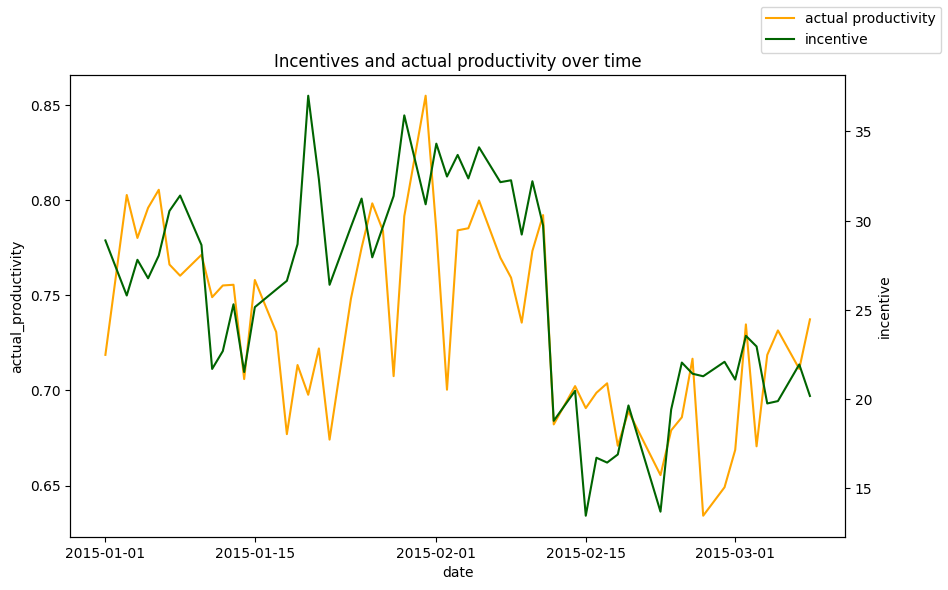

In [112]:
#examining trend of actual productivity and incentives
df_dt = df[df.date <= pd.to_datetime('2015-03-08')]
df_dt
plt.figure(figsize=(10,6))

line1 = sns.lineplot(x='date', y='actual_productivity', data=df_dt,errorbar=None, color='orange', legend=False, label = 'actual productivity' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='date', y='incentive', data=df_dt, errorbar=None, color='darkgreen',ax=ax2, legend=False, label = 'incentive')

line1.figure.legend()

plt.title("Incentives and actual productivity over time")
plt.show()

Incentives and actual productivity show similar trends, with periods of low incentives generally coinciding with periods of low actual productivity, and peaks in productivity generally coinciding with peaks in incentives.

***Comparison between Actual and Targeted Productivity over time***

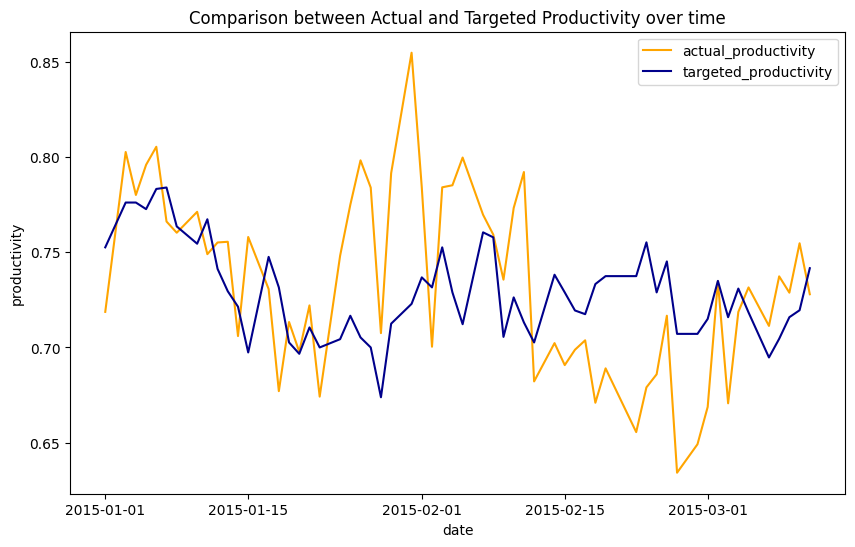

In [113]:
# Line plot to check actual and targeted productivity
plt.figure(figsize=(10,6))

sns.lineplot(x='date', y='actual_productivity', data=df,errorbar=None, color='orange' )
sns.lineplot(x='date', y='targeted_productivity', data=df,errorbar=None, color='darkblue')

plt.legend(labels=['actual_productivity','targeted_productivity'])
plt.ylabel("productivity")
plt.title("Comparison between Actual and Targeted Productivity over time")
plt.show()

Actual productivity generally exceeded targeted productivity except from mid February to beginning of March where targets were not being met.

***Actual Productivity per Department over time***

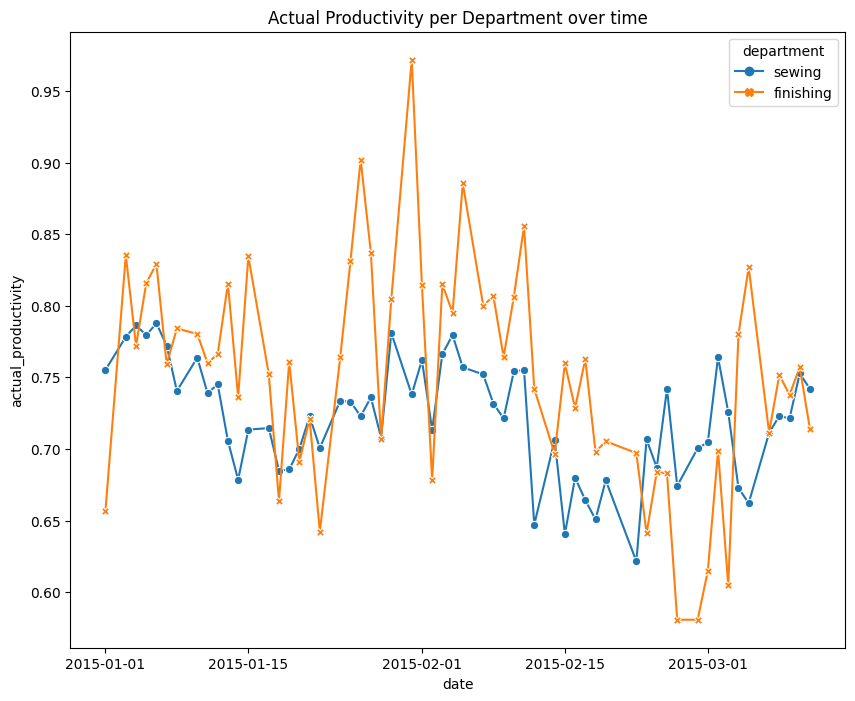

In [114]:
# Line plot to check actual productivity vs department
plt.figure(figsize=(10,8))

sns.lineplot(x='date', y='actual_productivity', hue = 'department',style= 'department', data=df, errorbar=None, markers=True, dashes=False)
# sns.lineplot(x='date', y='targeted_productivity', data=df, ci= None)
plt.title("Actual Productivity per Department over time")
plt.show()

The finishing department generally had higher actual productivity than the sewing department.

***Idle time by department***




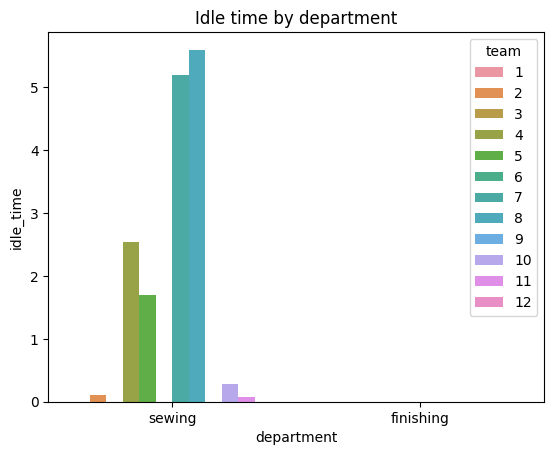

In [115]:
sns.barplot(x='department', y='idle_time',hue ='team' ,data=df, errorbar=None)
plt.title("Idle time by department")
plt.show()

Only the sewing department had idle time, with team 8's sewing division recording the highest idle time.

***Idle men by department***

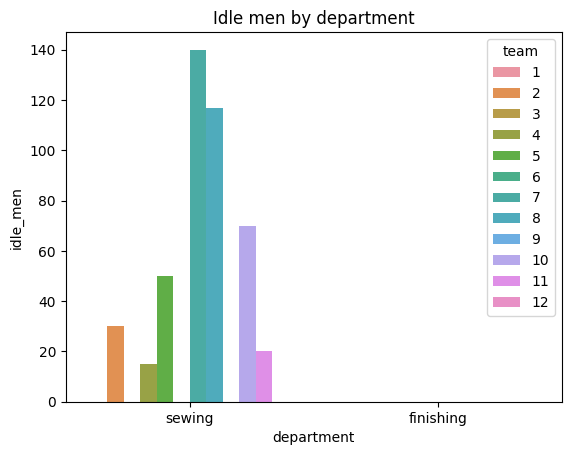

In [116]:
sns.barplot(x='department', y='idle_men',hue ='team' ,data=df, errorbar=None, estimator=sum)
plt.title("Idle men by department")
plt.show()

Only the sewing department had idle men, with team 7's sewing division recording the highest number of idle men.

***Department and team with more style changes***

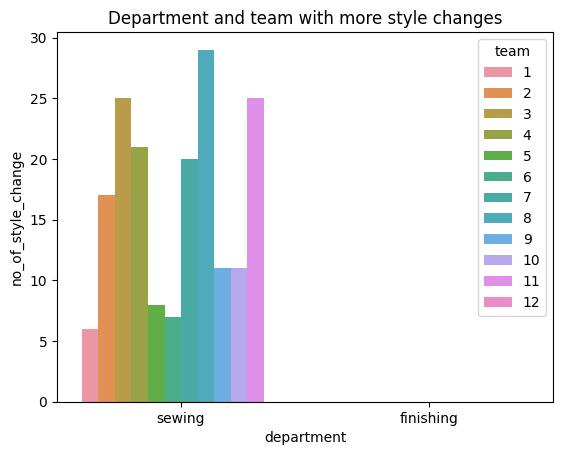

In [117]:
sns.barplot(x='department', y='no_of_style_change',hue ='team' ,data=df, errorbar=None, estimator=sum)
plt.title("Department and team with more style changes")
plt.show()

Only the sewing department had style changes, with team 8's sewing division recording the highest number of style changes.


**Average Productivity of each team**

C:\Users\ANSHUMAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


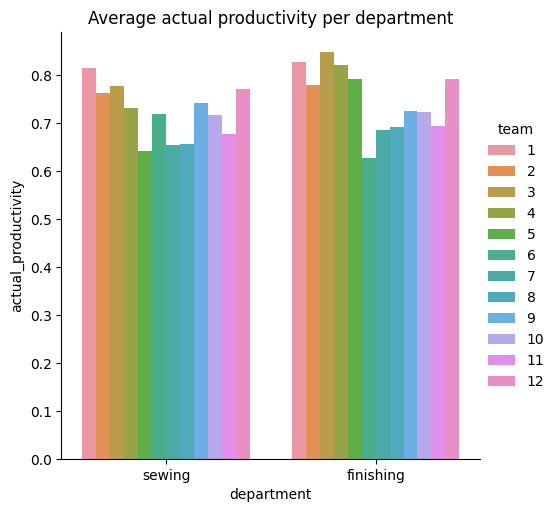

In [122]:
sns.catplot(data=df,x='department',y='actual_productivity',hue='team', errorbar=None, kind = 'bar')
plt.title("Average actual productivity per department")
plt.show()

Team 1's sewing division had the highest average actual productivity in the sewing department, while in the finishing department team 3's finishing division had the highest.

Team 5's sewing division had the lowest average actual productivity in the sewing department, while in the finishing department team 6's finishing division had the highest.

In [123]:
df[df.department == 'sewing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
7     sewing        27.109091
5     sewing        29.137931
8     sewing        31.285714
Name: incentive, dtype: float64

Teams 7, 5, and 8 (lowest performing in sewing) have the lowest average incentive in sewing

In [124]:
df[df.department == 'finishing'].groupby(['team','department'])['incentive'].mean().nsmallest(3)

team  department
6     finishing      0.000000
7     finishing      0.000000
8     finishing     18.113208
Name: incentive, dtype: float64

Teams 6, 7, and 8 (lowest performing in finishing) have the lowest average incentive in finishing

***Pairplot of numerical variables***

C:\Users\ANSHUMAN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\ANSHUMAN\AppData\Local\Temp\ipykernel_2824\3413519044.py:4: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


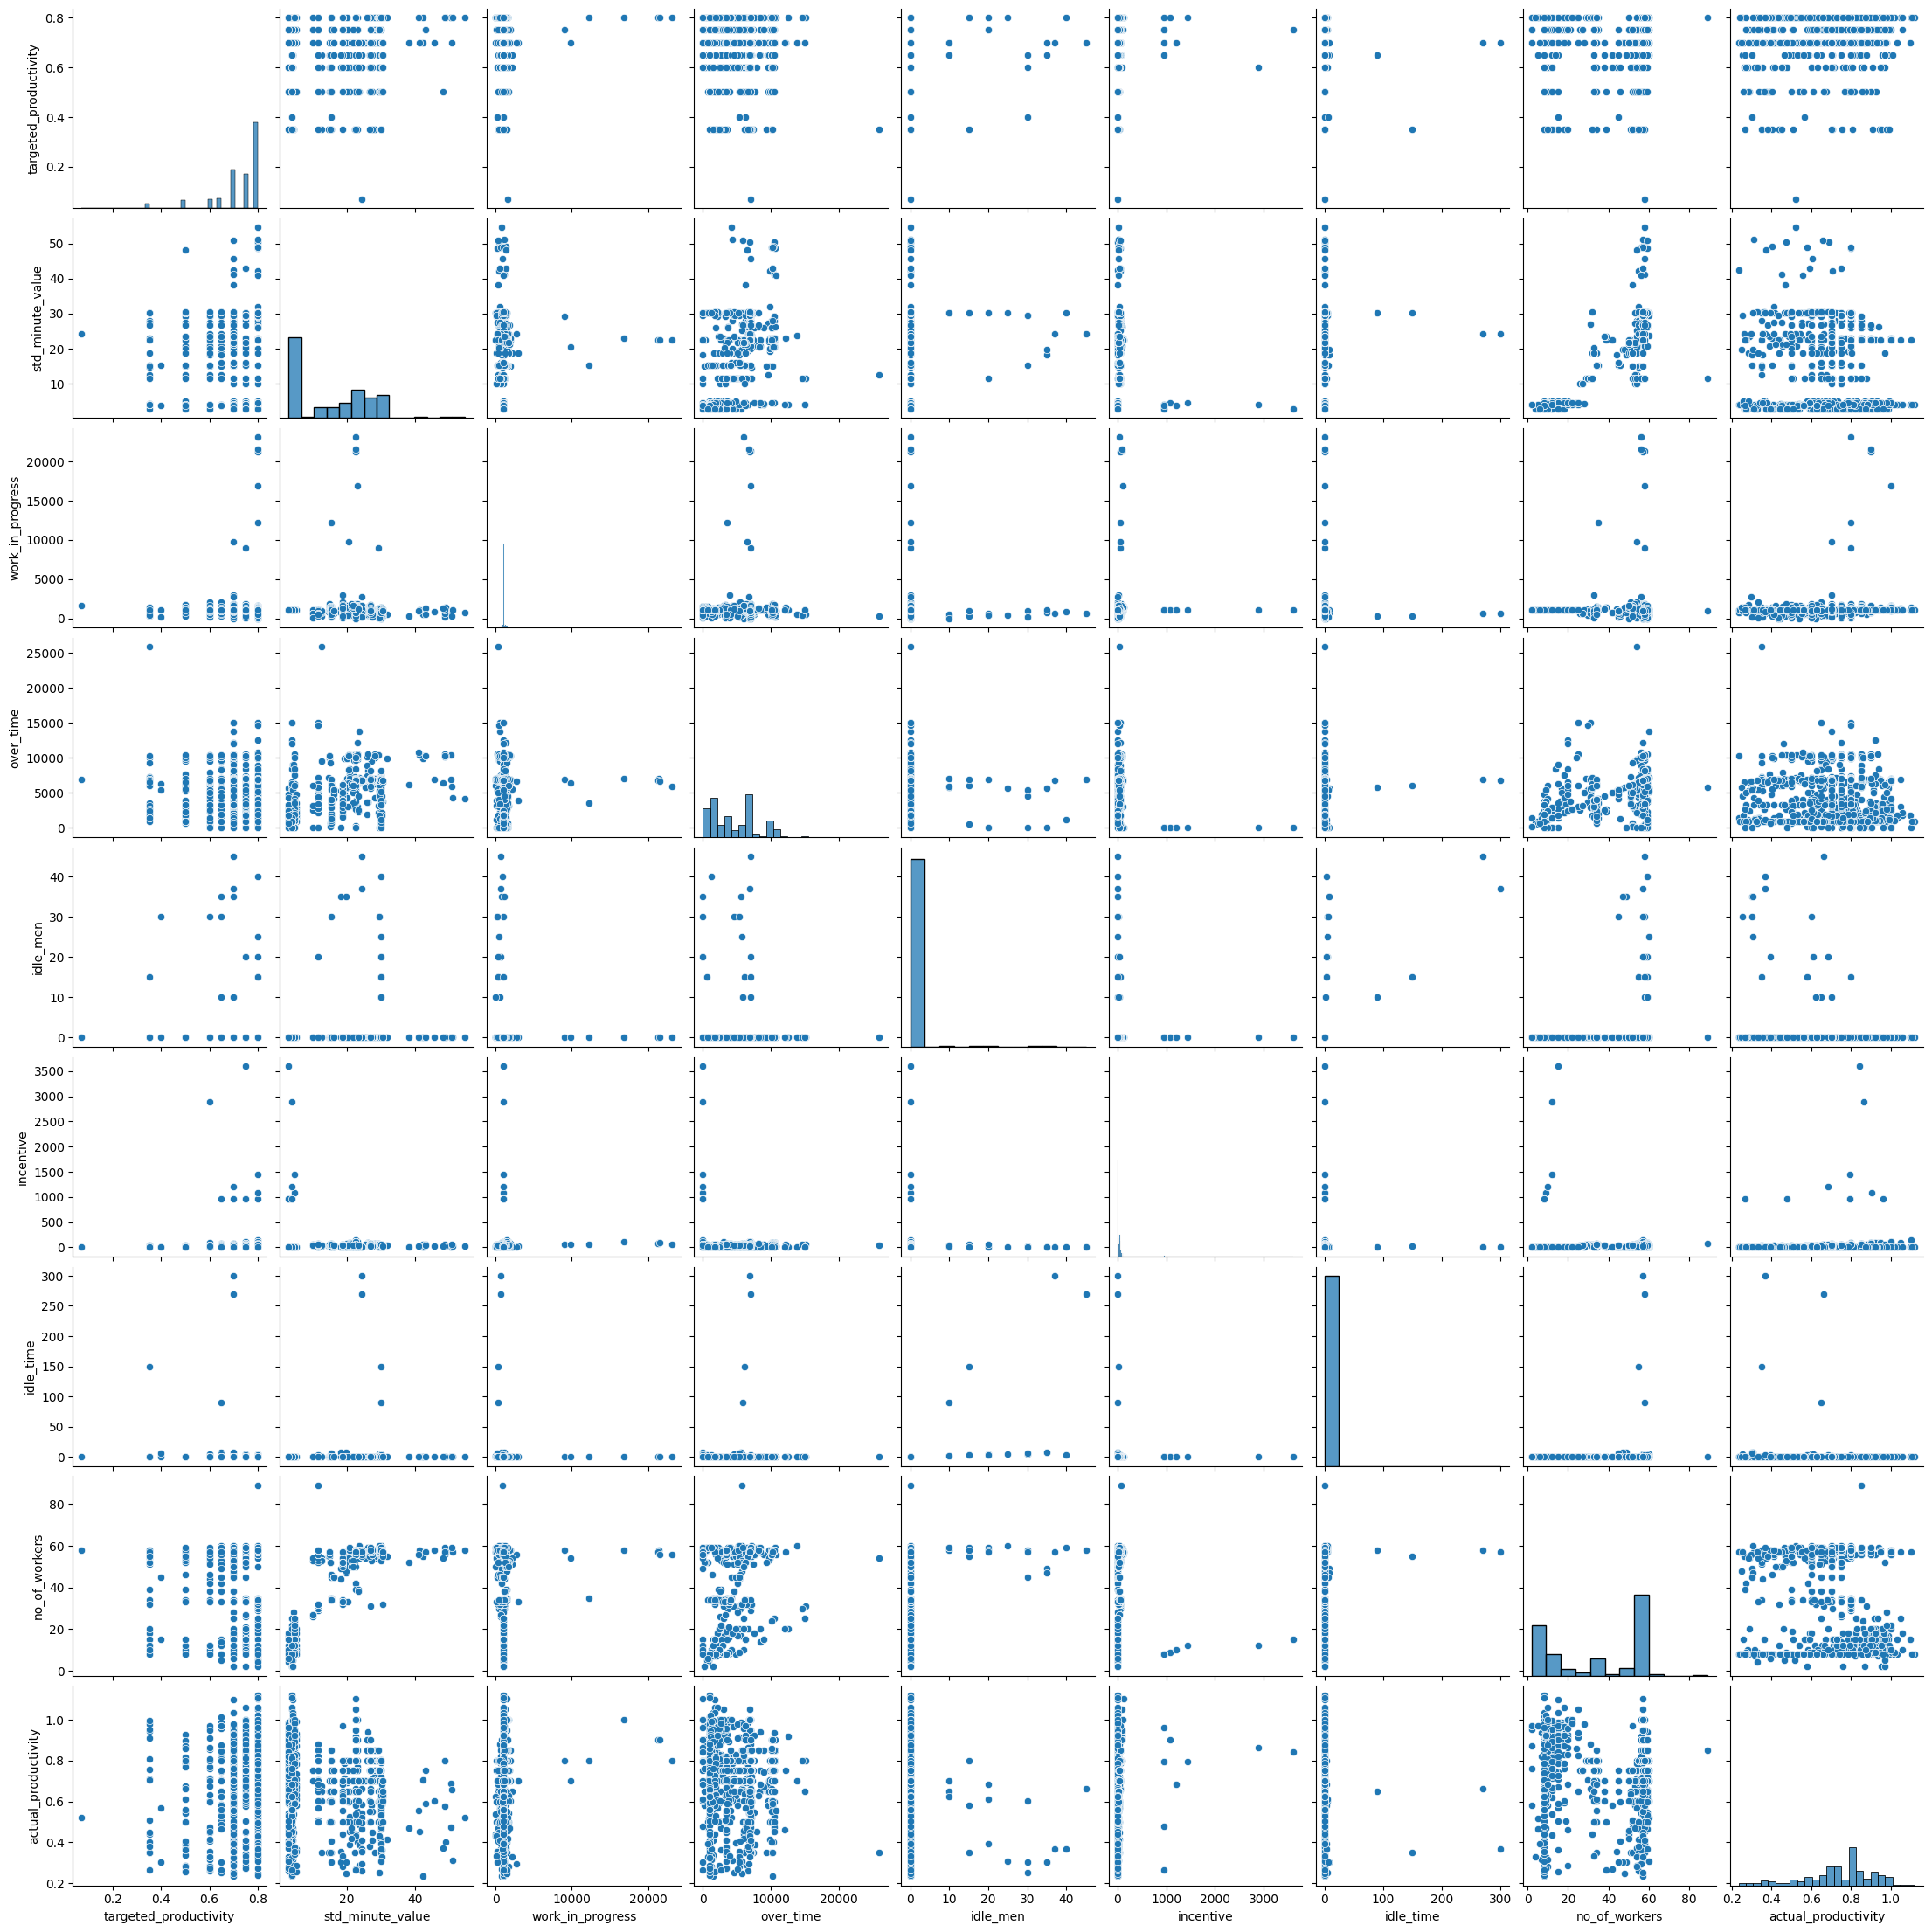

In [125]:
#pairplots of numerical data
sns.pairplot(df[contin])
# sns.set_style('white')
fig.tight_layout()
plt.show()

Most of the visuals do not depict clear, observable linear relationships between each other.

Number of workers and overtime, standard minute value appear to have a positive linear relationship. Same case for idle time and idle men

***Encoding categorical***

In [104]:
#checking for columns with object datatype
for col in cat:
  if df[col].dtype == "object":
    print(col)

department
day


In [105]:
#creating a copy of the dataframe
df_enc = df.copy()

In [106]:
print(df.day.unique())
print(df.department.unique())

['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']
['sewing' 'finishing']


In [107]:
#encoding
repl_dict = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday':2,
    'Thursday':3,
    'Saturday':4,
    'Sunday':5
}
df_enc['day'] = df_enc['day'].replace(repl_dict)

df_enc['department'] = df_enc['department'].replace({'sewing':0, 'finishing':1})

In [108]:
# checking that the values were encoded
#
print(df_enc.department.unique())
print(df_enc.day.unique())

[0 1]
[3 4 5 0 1 2]


***Correlation Heatmaps***

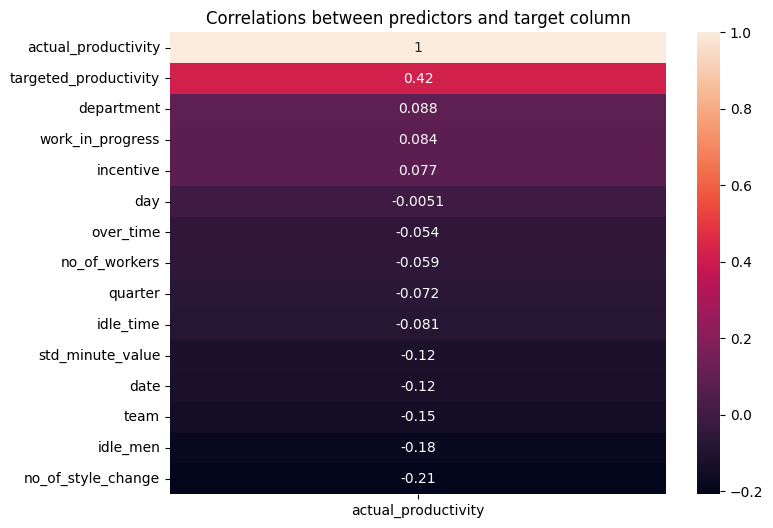

In [109]:
#highlighting correlations specifically with target
corr = df_enc.corr()
target_col=corr[['actual_productivity']].sort_values(by='actual_productivity', ascending=False)

plt.figure(figsize=(8,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

Actual productivity, the target column, has the highest correlation (moderate positive correlation of 0.42) with targeted productivity.

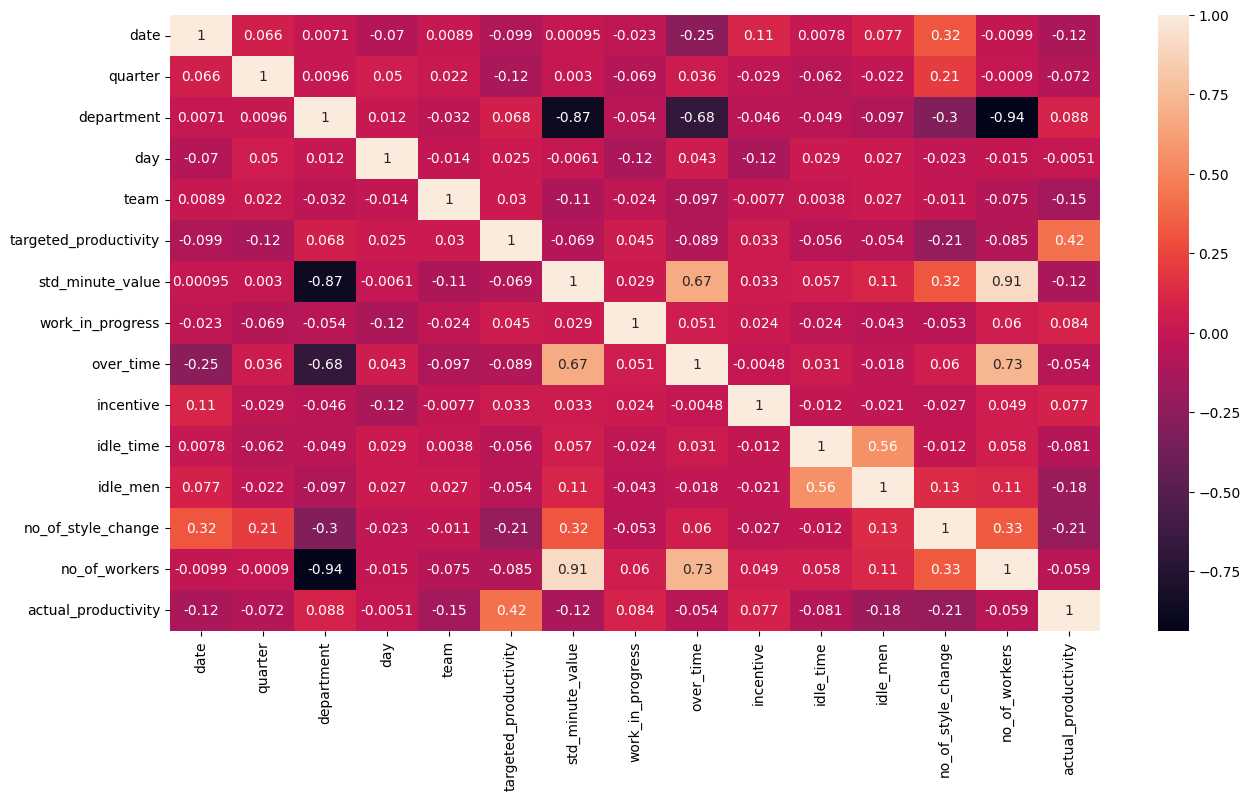

In [110]:
#showing correlation on a heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df_enc.corr(),annot=True)
plt.show()

-Actual productivity, the target column, has the highest correlation (moderate positive correlation of 0.42) with targeted productivity.

-Strong positive correlations(>0.5):
* standard minute value has strong positive correlations with number of workers and overtime

* Over time has a strong positive correlation with number of workers,  standard minute value

* Idle time and idle men have a strong positive correlation

# **7. Conclusion and Recommendations**

## Conclusion


1. To address the finishing department's lower productivity, reducing the number of style changes per day is suggested.
2. Identifying and eliminating bottlenecks in the assembly department is recommended.
3. Investing in training for finishing and assembly departments to enhance skills and efficiency is advised.
4. Implementing a continuous improvement program is proposed for ongoing productivity enhancements.

* The top factors influencing the productivity level of employees are:    
1. Targeted productivity
2. Standard minute value
3. Incentive

* The relationships between level of productivity and the predictor variables were investigated and visualised through exploratory analysis.

## Recommedations

* The management of each team in the industry should set clear, high, achievable goals each day. Targeted productivity was identified as a key feature during modelling, and it had a moderate positive correlation with actual productivity.

* Incentives motivate teams to work harder. The average incentives were higher in the category where productivity was greater than 0.5. Offering favourable incentives therefore aids in boosting productivity.

* In the sewing department, we recommend that the management of the lowest performing teams (5, 7 and 8) consider offering better incentives to their teams to motivate them more. Additionally, the management should investigate causes of high idle time in these teams, such as possible machine breakdowns.

* In the finishing department, we similarly recommend offering better incentives to the lowest performing teams (6,7,8). Teams 6 and 7 had as low as 0 average incentives.